In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

In [2]:
#the 30 stocks we will be working with from the Dow Jones stocks as of 2024
dow_jones_stocks = ['MMM', 'AXP', 'AMGN',  'AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO',
           'DIS', 'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
           'NVDA','PG','CRM',  'SHW', 'TRV', 'UNH', 'VZ', 'V', 'WMT']


# Gettinhg the stocks from the variable dow_jones_stocks for the year
#Made use of Adj Close to account for dividend and splits
stock_data = yf.download(dow_jones_stocks, start='2023-01-01', end='2023-12-31')['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [3]:
stock_data.head()

Ticker                           AAPL        AMGN       AMZN         AXP  \
Date                                                                       
2023-01-03 00:00:00+00:00  123.768456  245.468048  85.820000  143.260437   
2023-01-04 00:00:00+00:00  125.045044  248.038605  85.139999  146.590714   
2023-01-05 00:00:00+00:00  123.718979  250.355820  83.120003  143.082779   
2023-01-06 00:00:00+00:00  128.271072  258.180054  86.080002  146.737305   
2023-01-09 00:00:00+00:00  128.795578  253.414230  87.360001  146.962036   

Ticker                             BA         CAT         CRM       CSCO  \
Date                                                                       
2023-01-03 00:00:00+00:00  195.389999  230.392593  134.184311  45.047878   
2023-01-04 00:00:00+00:00  203.639999  232.784485  138.973053  45.038406   
2023-01-05 00:00:00+00:00  204.990005  231.742859  135.737411  44.403793   
2023-01-06 00:00:00+00:00  213.000000  240.018005  139.888977  45.767738   
2023-01-09 00:00:00+00:00  208.570007  237.857590  146.449875  46.014008   

Ticker                            CVX        DIS  ...        MSFT         NKE  \
Date                                              ...                           
2023-01-03 00:00:00+00:00  160.497803  88.273735  ...  235.711716  115.257545   
2023-01-04 00:00:00+00:00  158.791245  91.260178  ...  225.400925  117.645187   
2023-01-05 00:00:00+00:00  161.650864  91.200638  ...  218.720551  117.072556   
2023-01-06 00:00:00+00:00  162.868515  93.184990  ...  221.298233  120.867546   
2023-01-09 00:00:00+00:00  161.595505  94.028336  ...  223.452881  121.178131   

Ticker                          NVDA          PG         SHW         TRV  \
Date                                                                       
2023-01-03 00:00:00+00:00  14.305580  144.226868  235.046280  180.409256   
2023-01-04 00:00:00+00:00  14.739295  144.854889  239.769379  180.515320   
2023-01-05 00:00:00+00:00  14.255616  143.056442  223.636124  180.823837   
2023-01-06 00:00:00+00:00  14.849224  146.463013  231.540756  186.917206   
2023-01-09 00:00:00+00:00  15.617717  144.674088  231.746964  182.337540   

Ticker                            UNH           V         VZ        WMT  
Date                                                                     
2023-01-03 00:00:00+00:00  505.000671  204.195267  35.039959  46.692337  
2023-01-04 00:00:00+00:00  491.232483  209.334869  35.922070  46.744354  
2023-01-05 00:00:00+00:00  477.074829  207.857986  36.419899  46.585033  
2023-01-06 00:00:00+00:00  477.113800  214.395691  36.847847  47.726322  
2023-01-09 00:00:00+00:00  477.172272  215.232590  36.699699  47.131294  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Correlation Matrix Heatmap for Dow Jones Stocks')

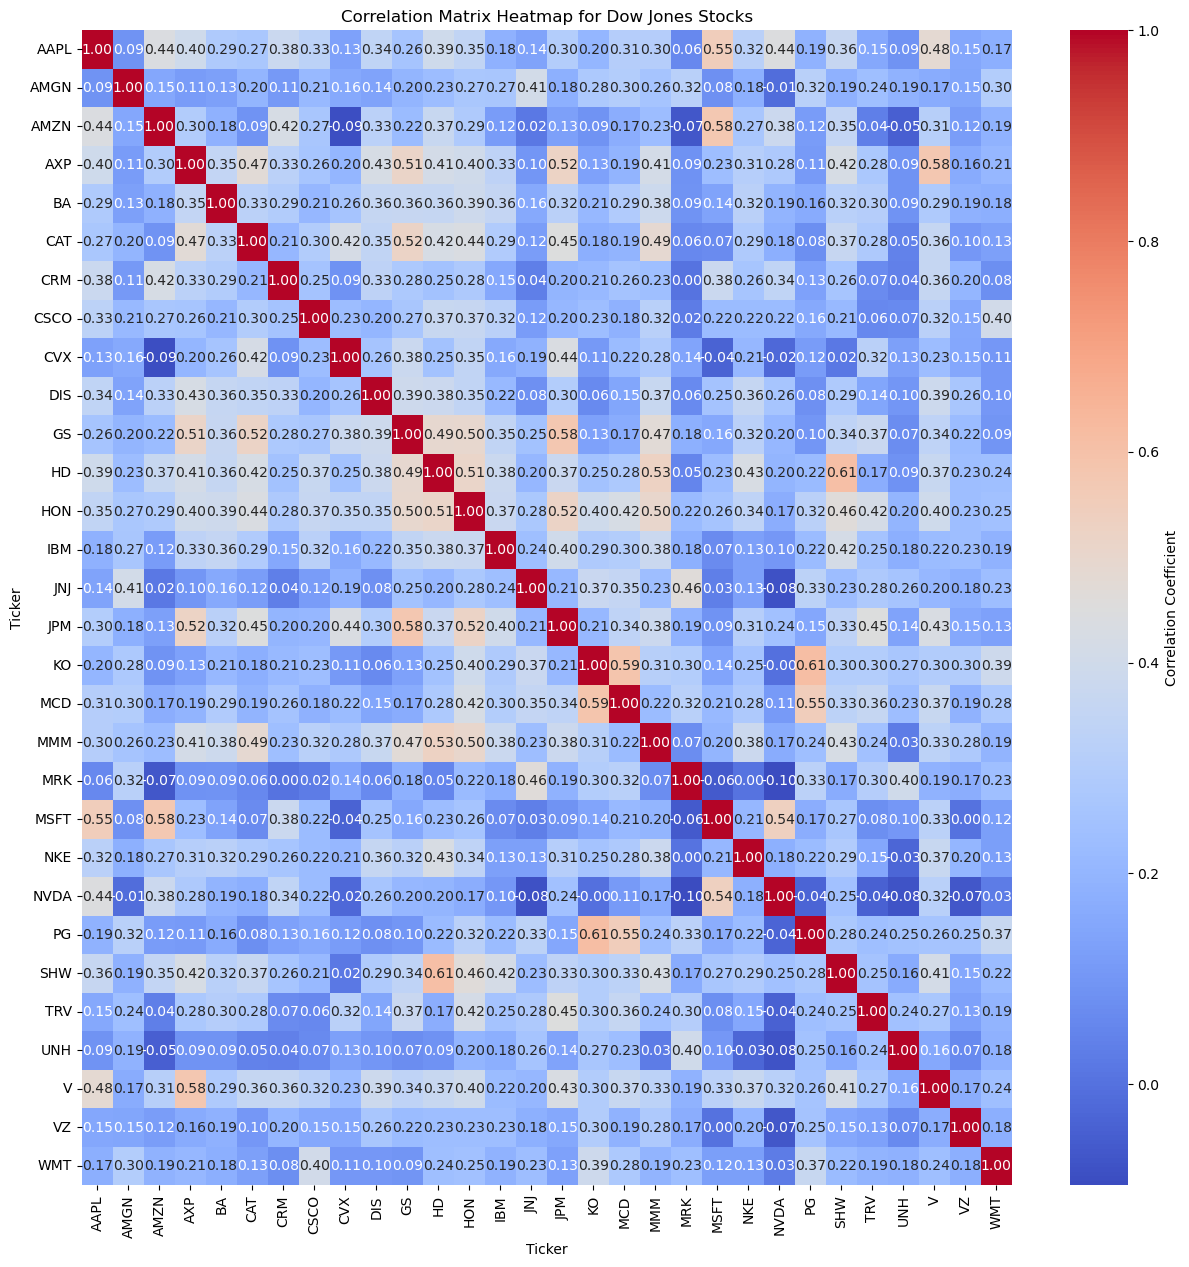

In [4]:
import seaborn as sns
# Calculate the daily returns for each stock and the first row will have nan since there was no previous date to subtract from
# then drop all the missing values including the first row 
stocks_dialy_returns = stock_data.pct_change().dropna()

# Constructed the correlation matrix
stocked_correlation_matrix = stocks_dialy_returns.corr()
#print("Correlation Matrix for the Dow Jones stocks:\n", stocked_correlation_matrix)
plt.figure(figsize=(15, 15))
sns.heatmap(stocked_correlation_matrix, annot=True, fmt='.2f',  cmap ="coolwarm",cbar_kws={'label': 'Correlation Coefficient'},  xticklabels=stocked_correlation_matrix.columns,  yticklabels=stocked_correlation_matrix.columns)


# Add a title
plt.title('Correlation Matrix Heatmap for Dow Jones Stocks')


## 1.3

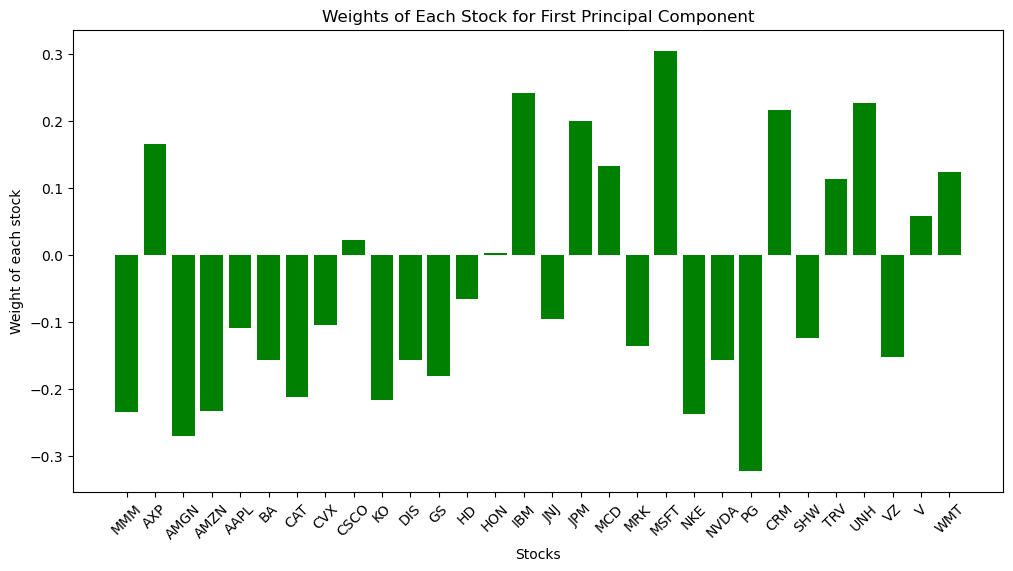

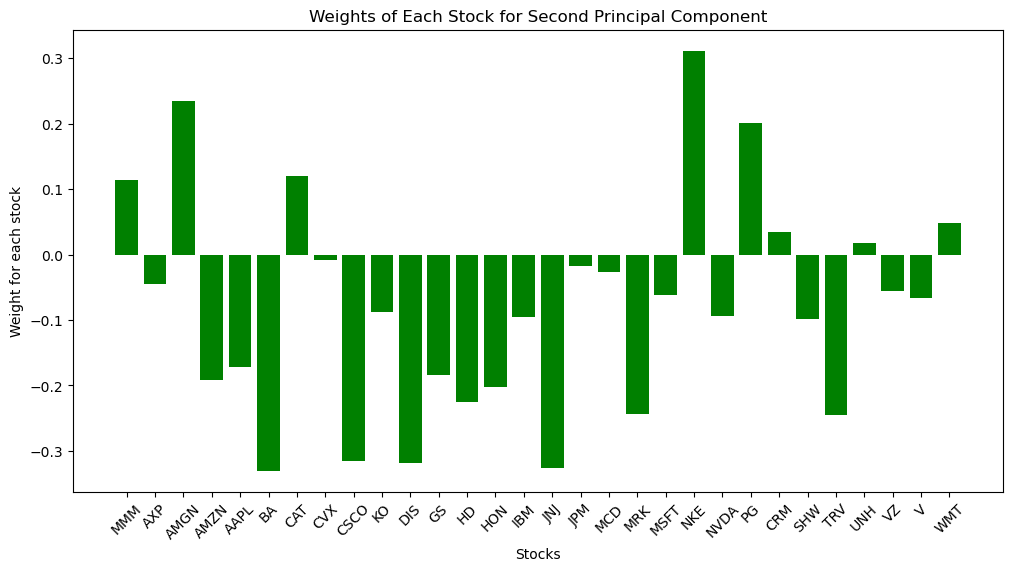

First Principal Component Weights:
[-0.23441333  0.16564801 -0.26967634 -0.23214047 -0.10944211 -0.1560963
 -0.21256292 -0.10448444  0.02269949 -0.21706009 -0.15599822 -0.18074496
 -0.06593148  0.00361315  0.24113519 -0.09586253  0.19969793  0.13209426
 -0.13502589  0.30482552 -0.23720184 -0.15675857 -0.32178381  0.21689603
 -0.12437343  0.1139931   0.22750733 -0.15259672  0.05861936  0.12398571]
Second Principal Component Weights:
[ 0.11402414 -0.04481753  0.23468193 -0.19135093 -0.1717929  -0.33012955
  0.12034816 -0.00762234 -0.31469462 -0.08801866 -0.31840449 -0.18397603
 -0.22504642 -0.20251717 -0.0946972  -0.32631682 -0.01676982 -0.02706159
 -0.24408695 -0.06108925  0.31142554 -0.0930894   0.20029216  0.03379768
 -0.09834938 -0.24497569  0.01831006 -0.05563852 -0.06683687  0.04819437]


In [6]:
# Perform PCA on the correlation matrix to the get the top 2 PC

principal_component_analysis = PCA()
principal_component_analysis.fit(stocked_correlation_matrix)
#pca =principal_component_analysis.transform(correlation_matrix) #Check if its neccessary transform

# Get explained variance ratios and principal components


# Retrieve the explained variance ratio for each principal component and this represents the proportion of the 
# dataset's total variance that each principal component accounts for.
explained_variance_ratio = principal_component_analysis.explained_variance_ratio_

#Retrieves the principal components themselves, vectors in the feature space and 
# components show the direction in the high-dimensional space along which the data varies the most.
principal_components = principal_component_analysis.components_


# Visualizing the weights of each stock for the first two principal components by getting the top 2 gotten above with teh highest variance.
plt.figure(figsize=(12, 6))
plt.bar(dow_jones_stocks, principal_components[0], color = "green")
plt.title('Weights of Each Stock for First Principal Component')
plt.xlabel('Stocks')
plt.ylabel('Weight of each stock')
plt.xticks(rotation=45)
plt.show()


#plot For the second component
plt.figure(figsize=(12, 6))
plt.bar(dow_jones_stocks, principal_components[1], color = "green")
plt.title('Weights of Each Stock for Second Principal Component')
plt.xlabel('Stocks')
plt.ylabel('Weight for each stock')
plt.xticks(rotation=45)
plt.show()

#Getting 
first_pc_weights = principal_components[0]
second_pc_weights = principal_components[1]

print("First Principal Component Weights:")
print(first_pc_weights)

print("Second Principal Component Weights:")
print(second_pc_weights)




## 1.4

In [8]:
import numpy as np
#looking at the cumulative variance explained by each pc we first get the variance of each PC and then get the cumulative sum 
cumulative_variance = np.cumsum(explained_variance_ratio)



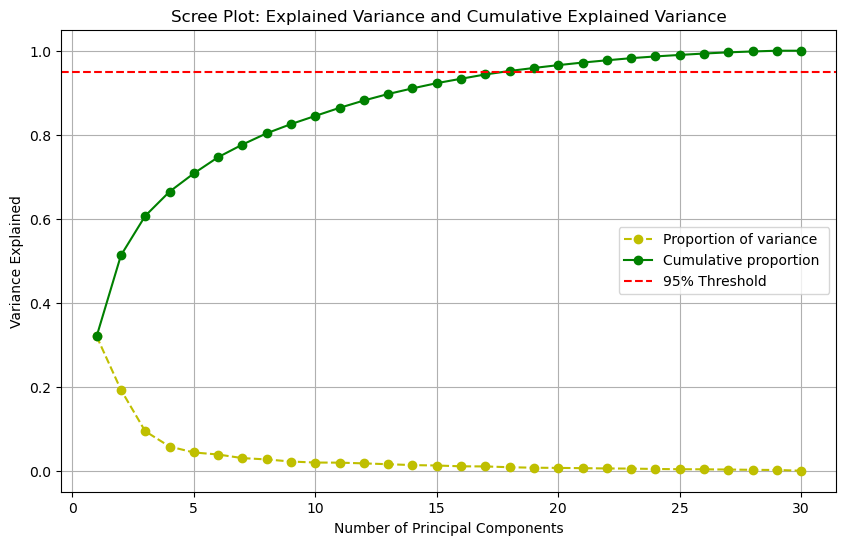

Total principal components required to explain 95% variance is: 18


In [9]:
plt.figure(figsize=(10, 6))

# Plot the explained variance ratios for each 
# This line shows how the variance explained accumulates as we include more components, this is indicated with a solid green line.

#plt.plot(range(1, explained_variance_ratio + 1, explained_variance_ratio, linestyle='--', color='y', label='Proportion of variance')

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='y', label='Proportion of variance')

# Plot the cumulative explained variance for the each PC and teh line shows the cumulative variance explained by each pc
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g', label='Cumulative proportion ')

plt.title('Scree Plot: Explained Variance and Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.legend()
plt.grid()
plt.show()

# Getting the number of components to explain 95% variance 
# np.argmax return the index where the cumulative variance first exceeds or equals 0.95, adding 1 to account for indexing.
#number_components_95 = sum(cumulative_variance >= 0.95) + 1
number_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Total principal components required to explain 95% variance is: {number_components_95}")


In [10]:
#Comfirming the this number 

print("Cumulative explained variance for the top 10 principal components:")
print(cumulative_variance[:15])

Cumulative explained variance for the top 10 principal components:
[0.3199656  0.51271126 0.60672593 0.66438565 0.70788438 0.7465059
 0.77653299 0.80343165 0.82530568 0.84477774 0.8640174  0.88148173
 0.89696072 0.91035468 0.92278806]


## 1.5

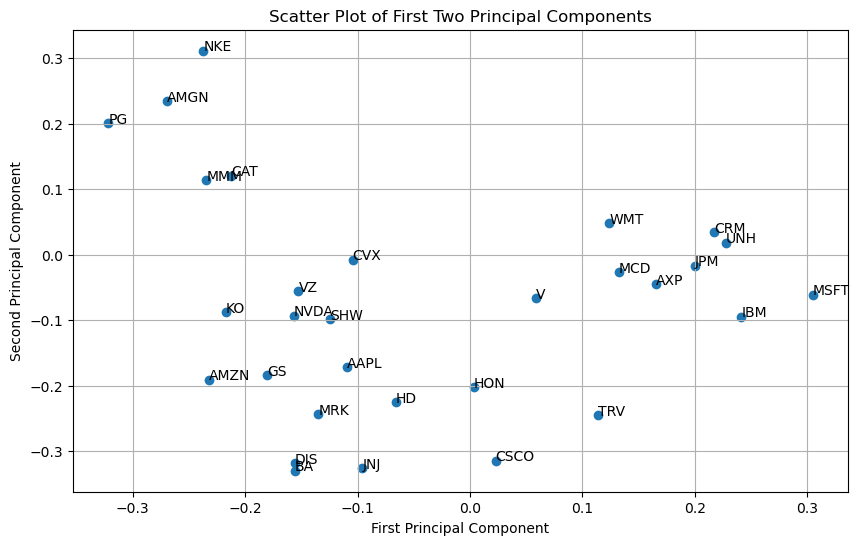

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of the first two principal components
def plot_principal_components(principal_components, stock_names):
    plt.figure(figsize=(10, 6))
    # Scatter plot for the first two principal components
    plt.scatter(principal_components[0], principal_components[1])
    
    # Add the name of each stock to the plot
    for i, stock in enumerate(stock_names):
        plt.annotate(stock, (principal_components[0][i], principal_components[1][i]), fontsize=10)
    
    plt.title('Scatter Plot of First Two Principal Components')
    plt.ylabel('Second Principal Component')
    plt.xlabel('First Principal Component')
    plt.grid()
    plt.show()


# Visualize the PCA scatter plot
plot_principal_components(principal_components, dow_jones_stocks)


In [13]:
# Calculate distances for the first two principal components
def calculate_distances_for_first_two_pcs(principal_components):
    # Calculate the average positions for the first two principal components
    average_positions = principal_components[:2].mean(axis=1)  
    # Calculate absolute distances from the average for the first two PCs
    distances_first_two = np.abs(principal_components[:2] - average_positions[:, np.newaxis])
    
    return distances_first_two, average_positions

# Calculate distances for the first two principal components
distances_first_two, average_positions = calculate_distances_for_first_two_pcs(principal_components)

# Display the top 3 stocks for the first two Principal Components (PCs)
# Loop through the first two PCs
for pc_index in range(2):  
    average_position = average_positions[pc_index]
    print("Principal Component", pc_index + 1, "(Average Position:", round(average_position, 4), "):")
    # Create a list of tuples where each tuple contains a stock name and its corresponding distance 
    # from the average position for the current principal component.
    # The list is built by iterating over all stocks and accessing their distance for the current PC.
    stock_distances = [(dow_jones_stocks[stock_index], distances_first_two[pc_index][stock_index])
                       for stock_index in range(len(dow_jones_stocks))]

    
    # Sorted the distance in descending order and take the top 3
    top_3_stocks = sorted(stock_distances, key=lambda x: x[1], reverse=True)[:3]
    
    # Print the top 3 stocks and their distances
    for stock_name, distance in top_3_stocks:
        print(" ", stock_name + ":", "Distance =", round(distance, 4))
    
    print() 


Principal Component 1 (Average Position: -0.045 ):
  MSFT: Distance = 0.3499
  IBM: Distance = 0.2862
  PG: Distance = 0.2767

Principal Component 2 (Average Position: -0.0775 ):
  NKE: Distance = 0.389
  AMGN: Distance = 0.3122
  PG: Distance = 0.2778



## Question 2:

In [15]:
# Compute the pairwise distance matrix from a given correlation matrix
# Transform the correlation values to a distance-like metric
# The formula (1 - correlation_matrix) shifts the range of correlation (-1 to 1)
# to a range more suitable for distance calculations.

# Multiply by 2 to scale the transformed values. This scaling ensures compatibility with Euclidean distance metrics when derived from correlation.

# Apply the square root to convert the scaled values into distances
pairwise_distance_matrix = np.sqrt(2 * (1 - stocked_correlation_matrix))

# Display the distance matrix
print("The Pairwise Distance Matrix:\n", pairwise_distance_matrix)

The Pairwise Distance Matrix:
 Ticker      AAPL      AMGN      AMZN       AXP        BA       CAT       CRM  \
Ticker                                                                         
AAPL    0.000000  1.349663  1.056714  1.099032  1.192059  1.208796  1.115370   
AMGN    1.349663  0.000000  1.302586  1.330651  1.320700  1.265589  1.335959   
AMZN    1.056714  1.302586  0.000000  1.186420  1.277301  1.350099  1.072898   
AXP     1.099032  1.330651  1.186420  0.000000  1.140662  1.027677  1.160424   
BA      1.192059  1.320700  1.277301  1.140662  0.000000  1.160865  1.188073   
CAT     1.208796  1.265589  1.350099  1.027677  1.160865  0.000000  1.258749   
CRM     1.115370  1.335959  1.072898  1.160424  1.188073  1.258749  0.000000   
CSCO    1.159059  1.253174  1.211920  1.214045  1.259491  1.186668  1.221198   
CVX     1.317407  1.297374  1.475273  1.264138  1.219564  1.076615  1.350696   
DIS     1.145318  1.312894  1.160251  1.072114  1.132767  1.142674  1.154134   
GS      1

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_20412\2401623317.py:6: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = hierarchy.linkage(distance_matrix, method='average')


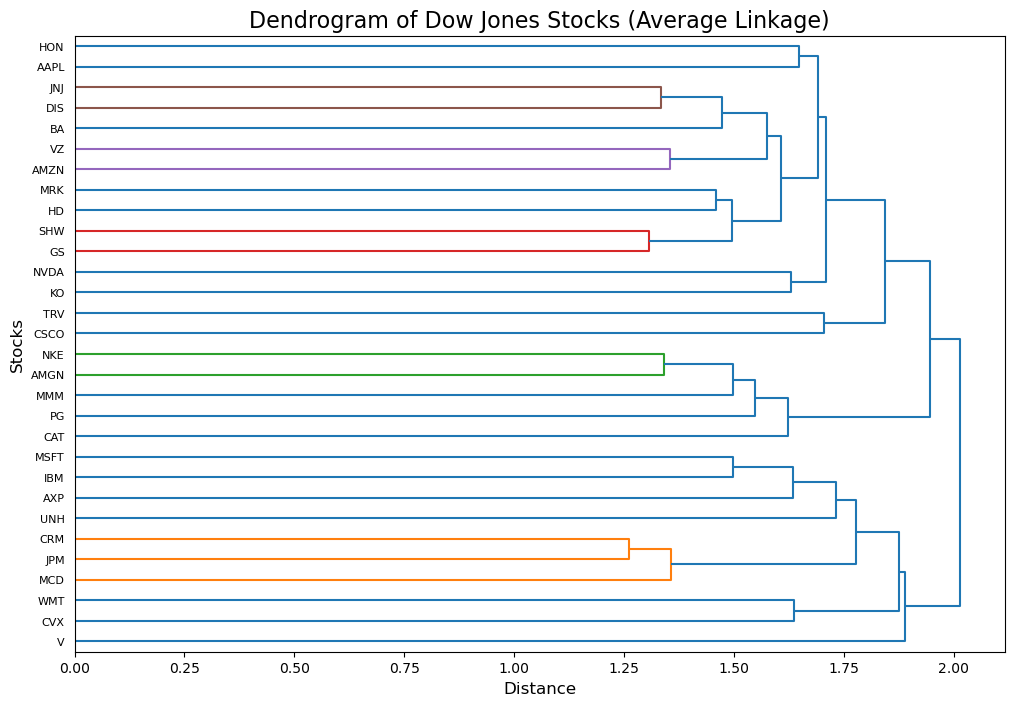

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

def create_horizontal_dendrogram(distance_matrix, stock_names):
    # Perform hierarchical clustering using average linkage method
    # This groups stocks based on their distances from each other
    linkage_matrix = hierarchy.linkage(distance_matrix, method='average')
    
    plt.figure(figsize=(12, 8))
    
    # Create the dendrogram (tree diagram) to be horizontal and  Uses stock names as labels on the branches
    stock_dendrogram = hierarchy.dendrogram( linkage_matrix, orientation='right',  labels=stock_names, leaf_font_size=8,leaf_rotation=0)
    
    plt.title('Dendrogram of Dow Jones Stocks (Average Linkage)', fontsize=16)
    plt.xlabel('Distance', fontsize=12)  
    plt.ylabel('Stocks', fontsize=12)  
    plt.show()
    return linkage_matrix

# Call the function to create and display the dendrogram using the distance matrix and stock names
Output_dendrogram = create_horizontal_dendrogram(pairwise_distance_matrix, dow_jones_stocks)

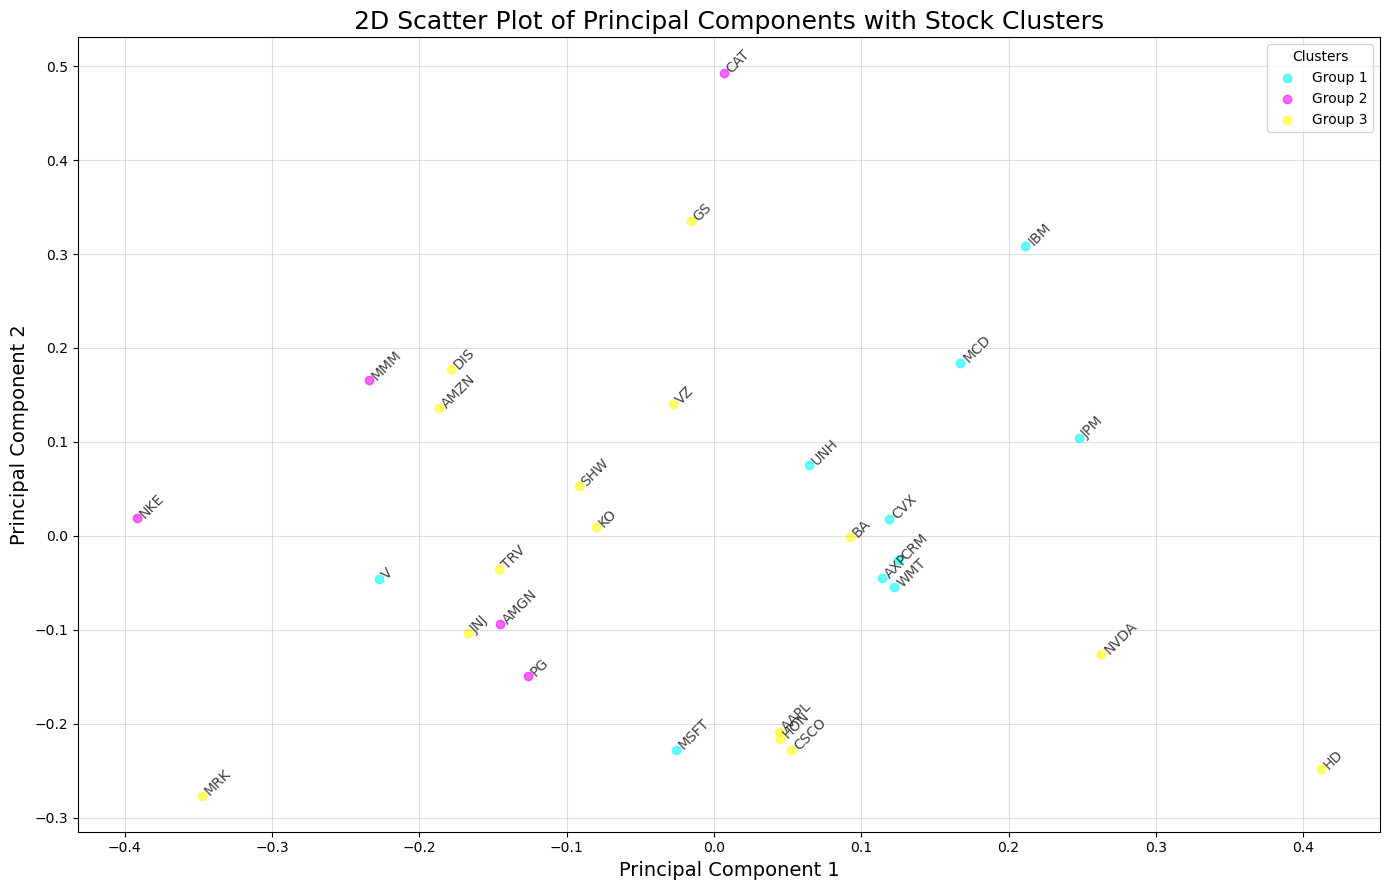

In [17]:
# from scipy.cluster.hierarchy import fcluster
# from sklearn.decomposition import PCA

# # Step 1: Create cluster labels
# n_clusters = 3  # Specify the number of clusters
# stock_clusters = fcluster(Output_dendrogram, t=n_clusters, criterion='maxclust')

# # Step 3: Scatter plot with clusters
# def plot_principal_components_with_clusters(principal_components, stock_names, cluster_labels, n_clusters):
#     """
#     Plots the first two principal components with stock names and cluster coloring.
#     """
#     plt.figure(figsize=(12, 8))
#     colors = ['red', 'blue', 'green', 'orange', 'purple']  # Adjust if more clusters are needed
    
#     # Plot each cluster with a unique color
#     for cluster in range(1, n_clusters + 1):
#         cluster_indices = np.where(cluster_labels == cluster)[0]
#         plt.scatter(
#             principal_components[cluster_indices, 0],  # First principal component
#             principal_components[cluster_indices, 1],  # Second principal component
#             label=f'Cluster {cluster}',
#             color=colors[cluster - 1],
#             alpha=0.7
#         )
    
#     # Annotate stock names
#     for i, stock in enumerate(stock_names):
#         plt.annotate(
#             stock,
#             (principal_components[i, 0], principal_components[i, 1]),
#             fontsize=9,
#             alpha=0.8
#         )
    
#     plt.title('Scatter Plot of First Two Principal Components with Clusters', fontsize=16)
#     plt.xlabel('First Principal Component', fontsize=12)
#     plt.ylabel('Second Principal Component', fontsize=12)
#     plt.legend()
#     plt.grid(alpha=0.3)
#     plt.show()

# # Call the function
# plot_principal_components_with_clusters(principal_components, dow_jones_stocks, stock_clusters, n_clusters)





from scipy.cluster.hierarchy import fcluster
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Set the desired number of clusters for stock categorization
desired_clusters = 3  
# Generate cluster labels based on hierarchical clustering from the dendrogram
stock_labels = fcluster(Output_dendrogram, t=desired_clusters, criterion='maxclust')

# Define a function to visualize stock clusters using principal component analysis
#
def visualize_stock_clusters(principal_components, stock_identifiers, labels, cluster_count):
    plt.figure(figsize=(14, 9))
    color_palette = ['cyan', 'magenta', 'yellow']  
    
    # We iterated through each cluster using a loop, identifying indices of stocks that belong to each cluster
    # For each cluster, we plotted the stocks in a scatter plot using their first two principal components as axes. 
    for cluster_index in range(1, cluster_count + 1):
        indices = np.where(labels == cluster_index)[0]  
        plt.scatter( principal_components[indices, 0],  principal_components[indices, 1],  label=f'Group {cluster_index}',   color=color_palette[cluster_index - 1], 
            alpha=0.6                            
        )

    # Annotate each point with its corresponding stock identifier
    for idx, stock in enumerate(stock_identifiers):
        plt.annotate(stock, (principal_components[idx, 0], principal_components[idx, 1]),fontsize=10,alpha=0.75,rotation=45)
    
    plt.title('2D Scatter Plot of Principal Components with Stock Clusters', fontsize=18)
    plt.xlabel('Principal Component 1', fontsize=14)
    plt.ylabel('Principal Component 2', fontsize=14)
    plt.legend(title='Clusters')
    plt.grid(alpha=0.4)                      
    plt.tight_layout()                        
    plt.show()                               

# Call the function to visualize the stock clusters based on PCA results
visualize_stock_clusters(principal_components, dow_jones_stocks, stock_labels, desired_clusters)

## Question 3

## 3.4

In [20]:
titanic_data = pd.read_csv("titanic3.csv")

In [21]:
titanic_data.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [22]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

# # Select the features we want to use for prediction
# features = ['age', 'sex', 'pclass']
# X = titanic_data[features].copy()  # Features for the model
# y = titanic_data['survived']        # What we're trying to predict

# # Fill missing values for 'age' and 'pclass' with their average
# X['age'].fillna(X['age'].mean(), inplace=True)
# X['pclass'].fillna(X['pclass'].mean(), inplace=True)

# # Convert 'sex' from categorical to numerical format
# le = LabelEncoder()
# X['sex'] = le.fit_transform(X['sex'].fillna('Unknown'))
# # This function optimizes a Random Forest model for the Titanic dataset.
# #It returns the trained model, the best number of trees, and the best accuracy.
# def optimize_random_forest(X, y, max_trees=200, step=10):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     forest_model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
#     forest_model.fit(X_train, y_train)
#      # To store accuracy scores for different numbers of trees
#     accuracies = [] 
    
#     # Try different numbers of trees in the forest
#     for num_trees in range(1, max_trees + 1, step):
#     # Initialize the Random Forest classifier with the current number of trees
#         forest_model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
        
#         forest_model.fit(X_train, y_train)
        
#         predictions = forest_model.predict(X_test)
        
#         # Calculate and store accuracy
#         accuracies.append(accuracy_score(y_test, predictions))

#     # Plot how accuracy changes with the number of trees
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, max_trees + 1, step), accuracies, marker='o')
#     plt.xlabel('Number of Trees')
#     plt.ylabel('Accuracy')
#     plt.title('Random Forest: Number of Trees vs Accuracy')
#     plt.grid(True)
#     plt.show()

#     # Finding the best number of trees and corresponding accuracy and this will return the maximum accuracy
#     optimal_number_trees = (np.arange(1, max_trees + 1, step))[np.argmax(accuracies)]
#     best_accuracy = max(accuracies)

#     print(f"Optimal number of trees: {optimal_trees}")
#     print(f"Best accuracy: {best_accuracy:.4f}")

#     # Train a final model using the best number of trees found
#     final_regression_model = RandomForestClassifier(n_estimators=optimal_number_trees, random_state=42)
#     final_regression_model.fit(X_train, y_train)

#     return final_regression_model, optimal_number_trees, best_accuracy

# # def plot_feature_importance(model, X):
# #     """This function shows which features are most important in our model."""
# #     importances = model.feature_importances_
    
# #     # Sort features by importance
# #     indices = np.argsort(importances)[::-1]
    
# #     plt.figure(figsize=(10, 6))
# #     plt.title("Feature Importances in Random Forest")
# #     plt.bar(range(X.shape[1]), importances[indices])
# #     plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
# #     plt.tight_layout()
# #     plt.show()

# # Now let's run our optimization and plot feature importance
# best_model, optimal_trees, best_accuracy = optimize_random_forest(X, y)  
# #plot_feature_importance(best_model, X) 

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Select the features we want to use for prediction
extracted_features_needed = ['age', 'sex', 'pclass']
X_titanic = titanic_data[extracted_features_needed].copy()  
 # What we're trying to predict
y_titanic = titanic_data['survived']       

# Fill missing values for 'age' and 'pclass' with their average, we calculate the mean of the column and impute data with that. 
X_titanic['age'].fillna(X_titanic['age'].mean(), inplace=True)
X_titanic['pclass'].fillna(X_titanic['pclass'].mean(), inplace=True)

# Convert 'sex' from categorical to numerical format
encoder = LabelEncoder()
X_titanic['sex'] = encoder.fit_transform(X_titanic['sex'].fillna('Unknown'))

# This function optimizes a Random Forest model for the Titanic dataset.
def optimizing_random_forest_model(X_train, y_train, max_trees=500, step=20):
#Define the parameter grid for GridSearchCV
# This grid specifies the hyperparameters to be tuned during the search. 'n_estimators' is the number of trees in the Random Forest model.
# We create a range starting from 1 up to max_trees (inclusive), incrementing by 'step'. This allows us to evaluate models with different numbers of trees to find the optimal value.
    parameters_grid = { 'n_estimators': range(1, max_trees + 1, step) }

    random_forest_model = RandomForestClassifier(random_state=42)

    #This will systematically search for the best combination of parameters specified in param_grid. 'estimator' is set to the Random Forest model we want to optimize.
# - 'param_grid' contains the hyperparameters to be tested (in this case, the number of trees).
# - 'scoring' will help with in evaluating the model based on accuracy.
# - 'cv' specifies the number of cross-validation folds to use (10 in this case), this will estimate the model performance by training and validating on different subsets of the data.

    optimatisation_search = GridSearchCV(estimator=random_forest_model, param_grid=parameters_grid, scoring='accuracy', cv=10) 
    optimatisation_search.fit(X_train, y_train)

    # Get the best estimator and its accuracy
    get_best_model = optimatisation_search.best_estimator_
    get_best_accuracy = optimatisation_search.best_score_
    optimal_number_trees = optimatisation_search.best_params_['n_estimators']

    print(f"Optimal number of trees obtained is : {optimal_number_trees}")
    print(f"Best accuracy: {get_best_accuracy:.4f}")

    # After getting the optimal features we will Train the final model using the best number of trees found
    final_titanic_regression_model = RandomForestClassifier(n_estimators=optimal_number_trees, random_state=42)
    final_titanic_regression_model.fit(X_train, y_train)
    
    results = optimatisation_search.cv_results_
    
    plt.figure(figsize=(8, 6))
    plt.xlabel('Number of Trees')
    plt.ylabel('Mean Cross Validated Accuracy')
    plt.title('Number of Trees vs Cross-Validated Accuracy')
    plt.plot(results['param_n_estimators'], results['mean_test_score'], marker='o')
    # Add a horizontal line at the optimal accuracy level
    plt.axhline(y=get_best_accuracy, color='red', linestyle='--', label=f'Optimal Accuracy: {get_best_accuracy:.4f}')

  
    plt.grid(True)
    plt.show()

    return final_titanic_regression_model, optimal_number_trees, get_best_accuracy


get_best_model, optimal_number_trees, get_best_accuracy = optimizing_random_forest_model(X_titanic, y_titanic)

C:\Users\STUDENT\AppData\Local\Temp\ipykernel_20412\1385137211.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_titanic['age'].fillna(X_titanic['age'].mean(), inplace=True)
C:\Users\STUDENT\AppData\Local\Temp\ipykernel_20412\1385137211.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Optimal number of trees obtained is : 241
Best accuracy: 0.7341


## 3.5

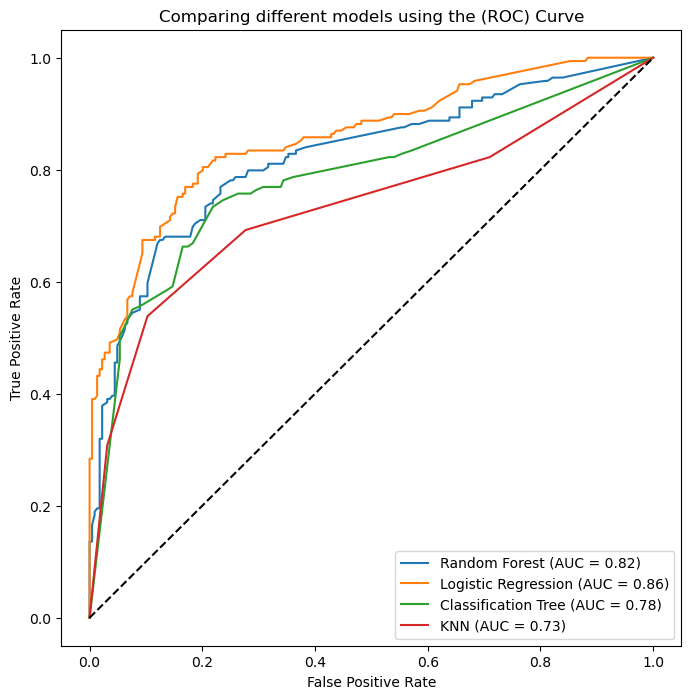

In [25]:


#This function trains several models on the provided data, computes their 
# predicted probabilities, and plots their ROC curves to evaluate their performance
def comparing_different_models_using_roc(X, y):

    X_titanic_training, X_tatanic_test, y_titanic_training, y_titatnic_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # declaring all the models that is going to be evaluated and the parameters needed. this allows for easy looping through.
    models_under_comparision = {
        'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42),
        'Logistic Regression': LogisticRegression(random_state=42),
        'Classification Tree': DecisionTreeClassifier(random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    plt.figure(figsize=(8, 8))

    for name, model in models_under_comparision.items():
        model.fit(X_titanic_training, y_titanic_training)
        
        # Get predicted probabilities for the positive class
        y_pred_probability = model.predict_proba(X_tatanic_test)[:, 1]
        
        # Compute ROC curve and AUC and this will help get false positive rate and true positive rate 
        false_positive_rate, true_positive_rate, _ = roc_curve(y_titatnic_test, y_pred_probability)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        
        # Plot ROC curve
        plt.plot(false_positive_rate, true_positive_rate, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Comparing different models using the (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Compare models using ROC analysis
comparing_different_models_using_roc(X_titanic, y_titanic)



### Question 4:

In [27]:
# Specify the delimiter as ';' in case it isn't a comma
redwine_data = pd.read_csv("winequality-red.csv", delimiter=';')
whitewine_data = pd.read_csv("winequality-white.csv", delimiter=';')


In [28]:
redwine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [29]:
whitewine_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

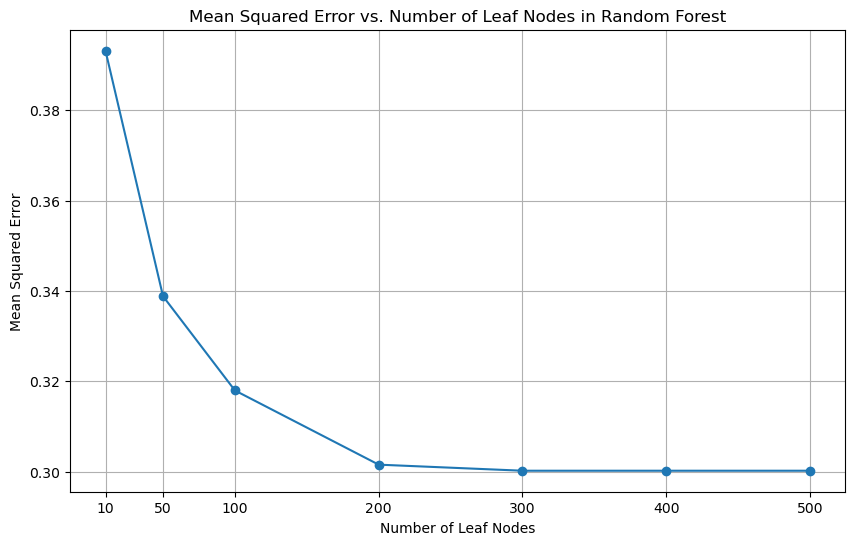

Optimal number of leaf nodes: 300


Optimal number of trees: 100
Final model constructed with:
 - Optimal number of leaf nodes: 300
 - Optimal number of trees: 100
Optimal Mean Squared Error (MSE) for the final model: 0.30020125000000003


In [33]:
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 

# Preparing the dataset by separating features and target variable
# Dropping the 'quality' column to get features and keeping it as our target variable
wine_feature_data = redwine_data.drop('quality', axis=1)  
wine_quality_target = redwine_data['quality']  

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(
    wine_feature_data, wine_quality_target, test_size=0.2, random_state=42
)

# Defining a range of values for optimal leafs and optimal trees to test
leaf_node_options = [10, 50, 100, 200, 300, 400, 500]  # Possible values for max_leaf_nodes
tree_count_options = [10, 20, 50, 100, 200]  #

# Step 1: Finding the optimal number of leaf nodes
mse_values_for_leaves = []  # List to store MSE values for different leaf node counts

# Iterating through each option of max_leaf_nodes to evaluate performance
for current_leaf_node in leaf_node_options:
    # Creating a Random Forest model with a specific number of leaf nodes
    rf_model_with_leaves = RandomForestRegressor(max_leaf_nodes=current_leaf_node, random_state=42)
    
    # Fitting the model on the training data
    rf_model_with_leaves.fit(X_train_wine, y_train_wine)
    
    # Making predictions on the test set
    predictions_on_test_leaves = rf_model_with_leaves.predict(X_test_wine)
    
    # Calculating Mean Squared Error for the predictions
    mse_value_leaves = mean_squared_error(y_test_wine, predictions_on_test_leaves)
    
    # Storing the MSE value for this configuration in the list
    mse_values_for_leaves.append(mse_value_leaves)

# Plotting MSE vs. Number of Leaf Nodes to visualize performance
plt.figure(figsize=(10, 6))
plt.plot(leaf_node_options, mse_values_for_leaves, marker='o')
plt.title('Mean Squared Error vs. Number of Leaf Nodes in Random Forest')
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error')
plt.xticks(leaf_node_options)
plt.grid()
plt.show()

# Finding the optimal number of leaf nodes based on minimum MSE value
optimal_leaf_node_count = leaf_node_options[np.argmin(mse_values_for_leaves)]
print(f"Optimal number of leaf nodes: {optimal_leaf_node_count}")

# Step 2: Finding the optimal number of trees (n_estimators) using the optimal max_leaf_nodes found earlier
mse_values_for_trees = []  # List to store MSE values for different tree counts

# Iterating through each option of n_estimators to evaluate performance
for current_tree_count in tree_count_options:
    # Creating a Random Forest model with a specific number of trees and optimal leaf nodes
    rf_model_with_trees = RandomForestRegressor(n_estimators=current_tree_count,max_leaf_nodes=optimal_leaf_node_count, random_state=42)
    
    # Fitting the model on the training data
    rf_model_with_trees.fit(X_train_wine, y_train_wine)
    
    # Making predictions on the test set
    predictions_on_test_trees = rf_model_with_trees.predict(X_test_wine)
    
    # Calculating Mean Squared Error for these predictions
    mse_value_trees = mean_squared_error(y_test_wine, predictions_on_test_trees)
    
    # Storing the MSE value for this configuration in the list
    mse_values_for_trees.append(mse_value_trees)

# Plotting MSE vs. Number of Trees to visualize performance
plt.figure(figsize=(10, 6))
plt.plot(tree_count_options, mse_values_for_trees, marker='o')
plt.title('Mean Squared Error vs. Number of Trees in Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Squared Error')
plt.xticks(tree_count_options)
plt.grid()
plt.show()


# Finding the optimal number of trees based on minimum MSE value
optimal_tree_count = tree_count_options[np.argmin(mse_values_for_trees)]
print(f"Optimal number of trees: {optimal_tree_count}")

# Constructing the final Random Forest model with both optimal parameters found earlier
final_rf_model_constructed = RandomForestRegressor(n_estimators=optimal_tree_count,
                                                   max_leaf_nodes=optimal_leaf_node_count,
                                                   random_state=42)

# Fitting this final model on the entire training dataset
final_rf_model_constructed.fit(X_train_wine, y_train_wine)

# Printing out details about the final model constructed with optimal parameters
print("Final model constructed with:")
print(f" - Optimal number of leaf nodes: {optimal_leaf_node_count}")
print(f" - Optimal number of trees: {optimal_tree_count}")

# Making predictions on the test set using the final model
final_predictions = final_rf_model_constructed.predict(X_test_wine)

# Calculating the optimal Mean Squared Error
optimal_mse = mean_squared_error(y_test_wine, final_predictions)

# Printing the optimal MSE
print(f"Optimal Mean Squared Error (MSE) for the final model: {optimal_mse}")

In [39]:

from sklearn.ensemble import RandomForestRegressor

# This function will help us get the important features 
def plot_feature_importance(model, X_train_set, y_train_set):
    # Fit the model to the training data we initialised earlier
    model.fit(X_train_set, y_train_set)
    
    # Get the feature importance from the trained model. This has to do with how much each feature contributes to the prediction.
    # Random Forests calculate this by looking at how much each feature reduces impurity in decision trees.
    importance_of_feature = model.feature_importances_
    
    # Create a DataFrame for visualization
    important_features_df = pd.DataFrame({'Feature': X_train_set.columns, 'Importance': importance_of_feature})
    
    # Sort the DataFrame by importance (ascending=False)
    important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importance as a horizontal bar graph
    plt.figure(figsize=(10, 6))
    plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='green')
    plt.xlabel('Importance Score')
    plt.title('Feature Importance from Random Forest Regressor')
    plt.show()

# Uisng the 'random_forest_regressor' and 'X_train_set' insitialisd before 
plot_feature_importance(final_rf_model_constructed, X_train_wine, y_train_wine)


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor

# # Define your random forest regressor
# random_forest_regressor = RandomForestRegressor(random_state=42)

# # Assuming X_train_set and y_train_set are already defined, e.g.:
# X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(features, target, test_size=0.2, random_state=42)

# # This function will help us get the important features
# def plot_feature_importance(model, feature_names):
#     model.fit(X_train_set, y_train_set)  # Fit the model to the training data
#     importance_of_feature = model.feature_importances_  # Get the importance of each feature
    
#     # Ensure that the length of importance_of_feature matches the number of features
#     if len(importance_of_feature) != len(feature_names):
#         raise ValueError("Mismatch between the number of features and the number of importance scores.")
    
#     # Create a DataFrame for visualization
#     important_features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_of_feature})
    
#     # Sort the DataFrame by importance
#     important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

#     # Plotting feature importance
#     plt.figure(figsize=(10, 6))
#     plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='green')
#     plt.xlabel('Importance Score')
#     plt.title('Feature Importance from Random Forest')
#     plt.show()

# # Assuming X_train_set is the features set and y_train_set is the target variable
# plot_feature_importance(random_forest_regressor, X_train_set.columns)
